In [1]:
import pandas as pd
import numpy as np

summary6 = open("summary6.csv", "r")

rem_text = summary6.read()
text_split = rem_text.split('\n')
rem_data = np.array(text_split[0].split(','))

bad_list = ['P008']
for i in range(1, len(text_split)-1):
    line = text_split[i].split(',')
    if line[1] not in bad_list:
        rem_data = np.vstack((rem_data, line))
        
pd.set_option('display.max_columns', None)
df = pd.DataFrame(rem_data[1:], columns=rem_data[0])
df

,name,id,o_rem_num,x_rem_num,o_rem_duration,x_rem_duration,o_rem_avg,x_rem_avg,o_rem_frag,x_rem_frag,o_rem_density,x_rem_density,o_am_vas,x_am_vas,o_pm_vas,x_pm_vas,o_am_cortisol,x_am_cortisol,o_pm_cortisol,x_pm_cortisol,note,age,exp,o_ahi,o_ai,o_hi,x_ahi,x_ai,x_hi,o_start,x_start,o_rem_latency,x_rem_latency,o_rem_per,x_rem_per,o_n3,x_n3,o_arousal,x_arousal,o_se,x_se,o_stage_change,x_stage_change
0,陳碧蓮,P001,9,6,4620,2460,513,410,6.4372,6.1911,17.749,36.22,.,.,.,.,10.8,5.9,5.7,3.4,.,60,19,19.2,4.4,14.8,22.1,5.9,16.2,21:27:15,21:27:15,4950,12990,18.1,11.5,0.9,10,24.5,28.7,87,80.5,15.68,20.65
1,陳佳星,P002,7,8,4740,3990,677,499,0.6371,2.9749,20.612,12.857,5,5,3,4,6.4,9.3,4.1,7.9,x_fs=200訊號有干擾,35,0.6,2.2,0.2,2.1,3.6,0.3,3.3,22:30:58,22:29:10,8550,3720,20.9,16.6,21.8,23,6.5,14.3,88.1,85.7,14.7,17.98
2,袁賽芳,P003,6,5,3990,5700,655,1140,7.0125,6.8386,20.401,11.509,3,2,5,3,7.7,9.3,4.7,5.8,o_fs=200訊號有干擾,54,10,39.7,9.7,30,36.7,7,29.7,22:43:54,22:17:49,6420,6600,17.9,24.6,15.5,19.6,31.6,24.6,93.6,83,17.35,13.7
3,鄭雅菁,P004,9,8,4230,5190,470,649,5.2128,7.3565,32.648,32.486,3,2,4,2,8,5.7,6.3,5.1,x_fs=200,45,9,4.1,0,4.1,7.6,0,7.6,22:03:16,21:40:28,6330,8670,19.9,22.8,4.8,10.2,13.5,19.9,88,83.9,11.94,12.62
4,謝秀珍,P005,8,7,6780,6510,848,930,3.4794,3.596,12.537,18.095,.,.,.,.,8.6,5.9,4,4.2,.,54,6,3.8,0,3.8,3.9,0,3.9,22:15:43,21:06:21,3270,10320,28.8,25.8,12.1,2.7,12.2,10.6,94.2,88.7,12.53,10.45
5,黃淑惠,P006,7,8,4770,4860,681,608,7.0629,4.4959,7.4423,26.687,4,3,3,3,9.6,8.5,6.1,7.1,o_fs=200,54,13,24.7,4.1,20.5,25.2,0.6,24.6,23:00:14,22:33:19,4650,3150,21.9,26.6,4.6,0,25.3,23.3,92.6,83.7,15.83,1.34
6,陳淑美,P007,3,5,1920,1950,640,390,1.4323,3.5026,15.573,46.718,3,2,4,2,12.4,13.4,8.1,7.6,o_fs=200; eeg有干擾,48,6,0.9,0,0.9,1.7,0,1.7,22:45:03,20:44:25,15540,19440,10.2,9.3,3.9,14.1,24.6,20.2,74.2,76.4,17.9,20.93
7,郭秉羱,P009,6,7,3360,3900,560,557,0.9077,0.741,9.6131,11.692,3,2,4,7,10.1,11.4,7.4,7.2,.,19,0.4,2.5,0.8,1.7,1.8,0.6,1.2,22:45:29,22:34:36,8880,5820,13.1,15.9,16.8,13.1,10.7,11.4,95.5,93.2,16.14,17.53
8,張柏瑞,P010,7,7,2700,3930,386,561,9.5444,6.1959,32.148,19.211,.,.,.,.,11.3,7.1,5.3,4.6,o訊號怪怪的; x_fs=200,26,2.5,14,0.2,13.8,11.6,0.7,10.9,23:12:18,23:04:37,4500,4200,13,18.9,9.9,15.4,17.7,23.3,91,95.5,17.87,12.24
9,莊惠雅,P011,13,6,3210,1050,247,175,13.5,15.829,45.078,26.857,7,5,5,5,7.6,5.1,4.6,3.6,x_fs=200; x_eog高頻雜訊,43,20,29.2,0,29.2,31.8,0.7,31.1,22:49:00,22:57:05,4830,8400,16.7,6.7,5.8,8,38.5,52.3,88.9,72.7,17.03,26.86


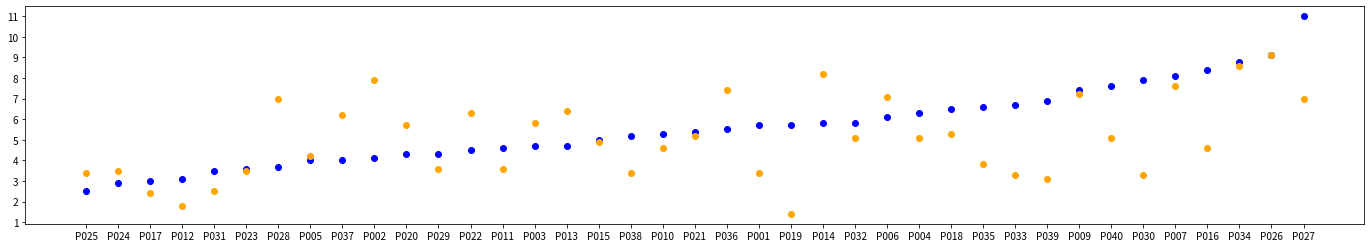

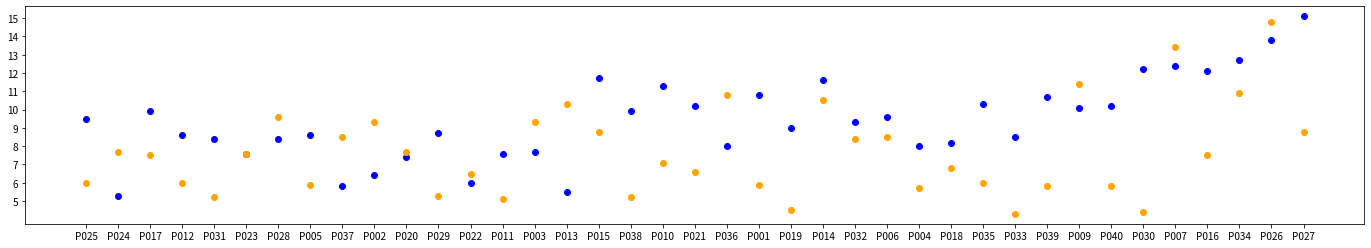

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

data = df[['id', 'o_pm_cortisol', 'x_pm_cortisol', 'o_am_cortisol', 'x_am_cortisol']]
data = data.astype({'o_pm_cortisol': 'single', 'x_pm_cortisol': 'single', 'o_am_cortisol': 'single', 'x_am_cortisol': 'single'})
data = data.sort_values('o_pm_cortisol')

x = np.array(data['id'])
y1 = np.array(data['o_pm_cortisol'])
y2 = np.array(data['x_pm_cortisol'])
y3 = np.array(data['o_am_cortisol'])
y4 = np.array(data['x_am_cortisol'])

# p.m.
plt.figure(figsize=(24,4))
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
plt.scatter(x, y1, c='blue')
plt.scatter(x, y2, c='orange')

plt.yticks(np.arange(1, 12, 1)) 

# plt.title("早晨cortisol: 暴露(藍)、非暴露(橘)")
plt.show()

# a.m.
plt.figure(figsize=(24,4))
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
plt.scatter(x, y3, c='blue')
plt.scatter(x, y4, c='orange')

plt.yticks(np.arange(5, 16, 1))
# plt.title("傍晚cortisol: 暴露(藍)、非暴露(橘)")
plt.show()

Text(0, 0.5, 'Fragmentation(%)')

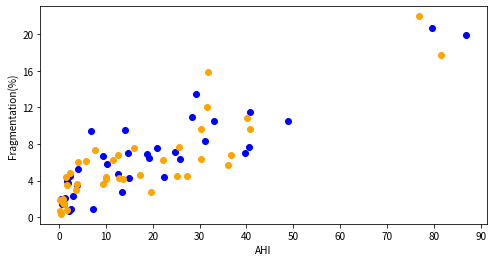

In [46]:
# AHI fragmentation

data = df[['id', 'o_rem_frag', 'x_rem_frag', 'o_ahi', 'x_ahi']]
data = data.astype({'o_rem_frag': 'single', 'x_rem_frag': 'single', 'o_ahi': 'single', 'x_ahi': 'single'})
data = data.sort_values('o_ahi')

x1 = np.array(data['o_ahi'])
x2 = np.array(data['x_ahi'])
y1 = np.array(data['o_rem_frag'])
y2 = np.array(data['x_rem_frag'])

plt.figure(figsize=(8,4))
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
plt.scatter(x1, y1, c='blue')
plt.scatter(x2, y2, c='orange')
plt.yticks(np.arange(0, 22, 4))
plt.xticks(np.arange(0, 95, 10))
plt.xlabel('AHI')
plt.ylabel('Fragmentation(%)')


Text(0, 0.5, 'Stage change(%)')

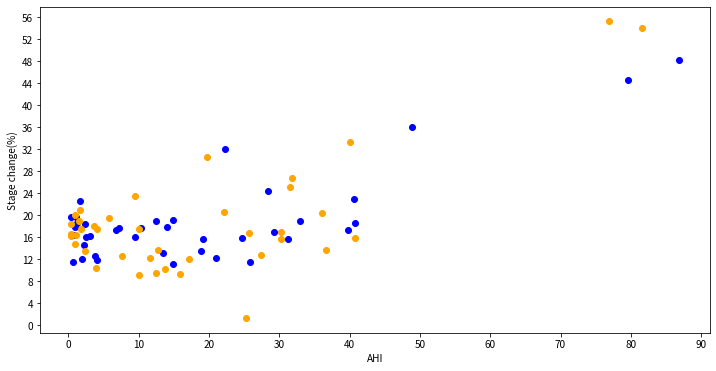

In [57]:
# AHI fragmentation

data = df[['id', 'o_stage_change', 'x_stage_change', 'o_ahi', 'x_ahi']]
data = data.astype({'o_stage_change': 'single', 'x_stage_change': 'single', 'o_ahi': 'single', 'x_ahi': 'single'})
data = data.sort_values('o_ahi')

x1 = np.array(data['o_ahi'])
x2 = np.array(data['x_ahi'])
y1 = np.array(data['o_stage_change'])
y2 = np.array(data['x_stage_change'])

plt.figure(figsize=(12,6))
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
plt.scatter(x1, y1, c='blue')
plt.scatter(x2, y2, c='orange')
plt.yticks(np.arange(0, 60, 4))
plt.xticks(np.arange(0, 95, 10))
plt.xlabel('AHI')
plt.ylabel('Stage change(%)')


In [50]:
data
# ahi8 = np.array(data['id'])
# ahi8 = ahi8[13:23]
# ahi8

,id,o_rem_frag,x_rem_frag,o_ahi,x_ahi
14,P016,2.025900,0.352500,0.400000,0.400000
30,P032,1.412800,1.529300,0.600000,0.900000
28,P030,1.641200,1.961500,0.800000,0.900000
6,P007,1.432300,3.502600,0.900000,1.700000
24,P026,1.431400,1.858600,1.000000,0.300000
33,P035,2.104800,1.464500,1.200000,1.100000
35,P037,3.941000,6.048600,1.700000,4.100000
20,P022,3.752400,4.801600,1.900000,2.300000
1,P002,0.637100,2.974900,2.200000,3.600000
27,P029,4.521300,0.673900,2.400000,0.300000


In [42]:
data = df[['id', 'o_rem_frag', 'x_rem_frag', 'o_ahi', 'x_ahi']]
data = data.astype({'o_rem_frag': 'single', 'x_rem_frag': 'single', 'o_ahi': 'single', 'x_ahi': 'single'})
data = data.sort_values('x_ahi')

x1 = np.array(data['o_ahi'])
x2 = np.array(data['x_ahi'])
x2

array([ 0.3,  0.3,  0.4,  0.9,  0.9,  1.1,  1.5,  1.7,  1.8,  2.3,  3.6,
        3.9,  4.1,  5.8,  7.6,  9.4, 10. , 10.1, 11.6, 12.5, 12.8, 13.7,
       15.9, 17.2, 19.7, 22.1, 25.2, 25.7, 27.4, 30.2, 30.3, 31.5, 31.8,
       36. , 36.7, 40.1, 40.7, 76.9, 81.6], dtype=float32)

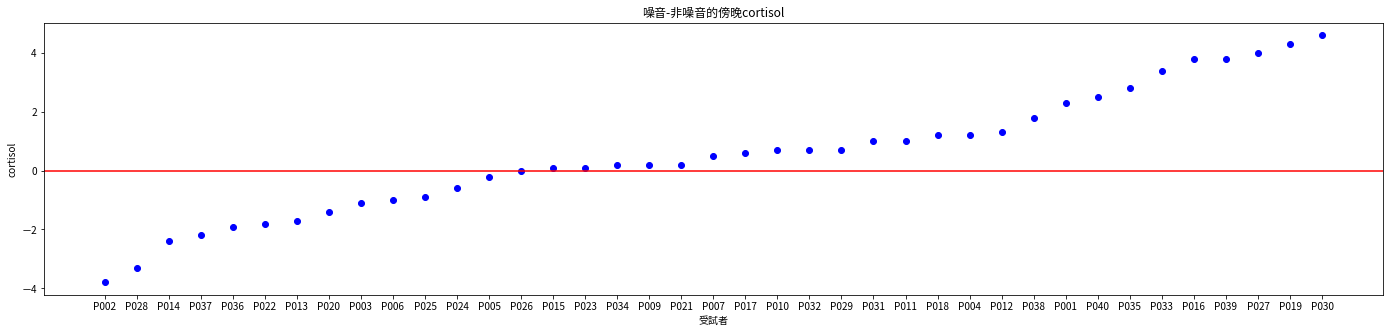

['P002' 'P028' 'P014' 'P037' 'P036' 'P022' 'P013' 'P020' 'P003' 'P006'
 'P025' 'P024' 'P005' 'P026' 'P015' 'P023' 'P034' 'P009' 'P021' 'P007'
 'P017' 'P010' 'P032' 'P029' 'P031' 'P011' 'P018' 'P004' 'P012' 'P038'
 'P001' 'P040' 'P035' 'P033' 'P016' 'P039' 'P027' 'P019' 'P030']


In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

data = df[['id', 'o_pm_cortisol', 'x_pm_cortisol']]
data = data.astype({'o_pm_cortisol': 'single', 'x_pm_cortisol': 'single'})
data['diff_pm_cortisol'] = data['o_pm_cortisol'] - data['x_pm_cortisol']
data = data.sort_values('diff_pm_cortisol')

x = np.array(data['id'])
y = np.array(data['diff_pm_cortisol'])


plt.figure(figsize=(24,5))
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
plt.scatter(x, y, c='blue')
plt.axhline(y=0, c='red')
# 正常範圍為3.7至19.4之間

# plt.yticks(np.arange(5, 16, 0.5))  
plt.ylabel("cortisol")
plt.xlabel("受試者")
plt.title("噪音-非噪音的傍晚cortisol")
plt.show()

print(np.array(data['id']))

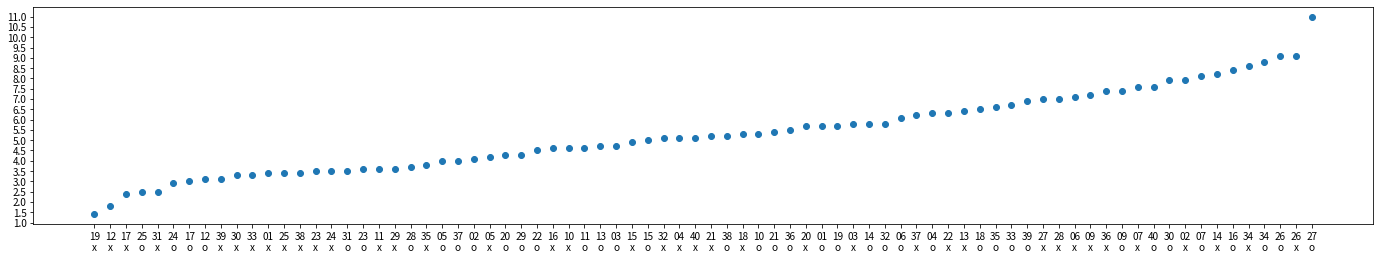

In [44]:
ids = np.array(df['id'].str.slice(start=2))
ids1 = ids + "\no"
ids2 = ids + "\nx"
ids = np.hstack((ids1, ids2))

o_pm_cortisol = np.array(df['o_pm_cortisol'], dtype=np.single)
x_pm_cortisol = np.array(df['x_pm_cortisol'], dtype=np.single)
pm_cortisol = np.hstack((o_pm_cortisol, x_pm_cortisol))

d = {"ids": ids, "pm_cortisol": pm_cortisol}
df2 = pd.DataFrame(data=d)
df2 = df2.sort_values('pm_cortisol')

x = np.array(df2['ids'])
y = np.array(df2['pm_cortisol'])

plt.figure(figsize=(24,4))
plt.yticks(np.arange(1, 12, 0.5))  
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
plt.scatter(x=x, y=y)

Text(0.5, 1.0, 'rem_density(%)')

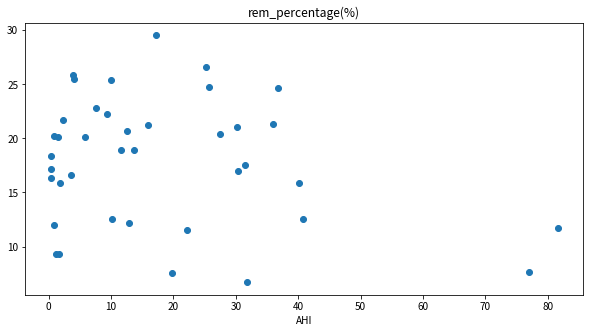

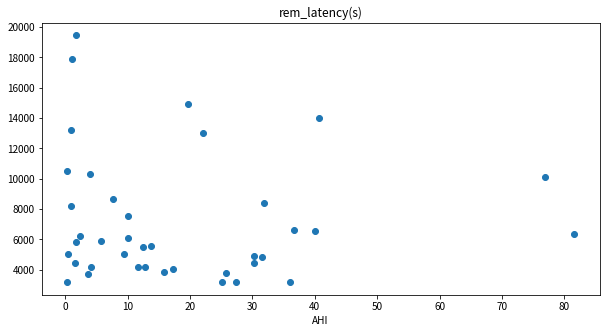

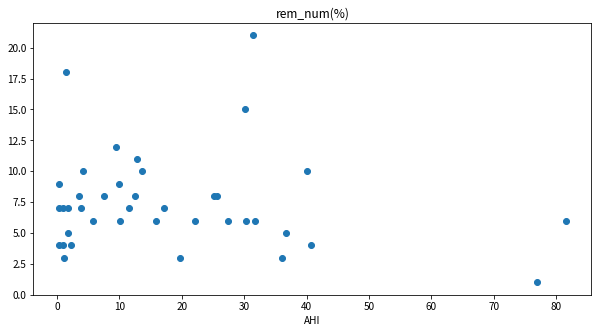

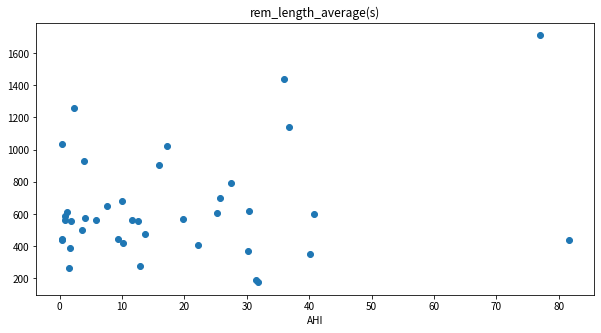

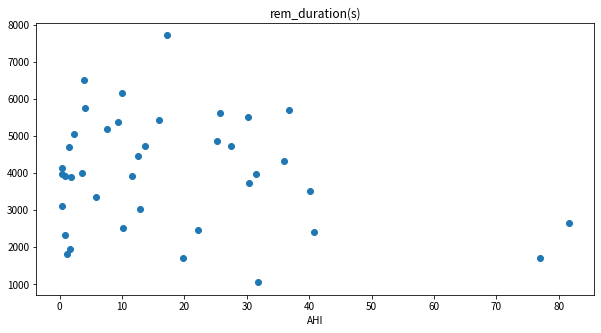

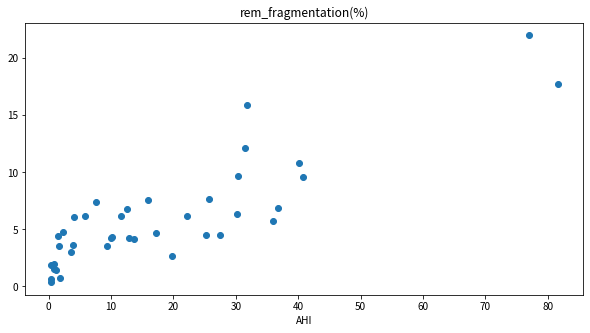

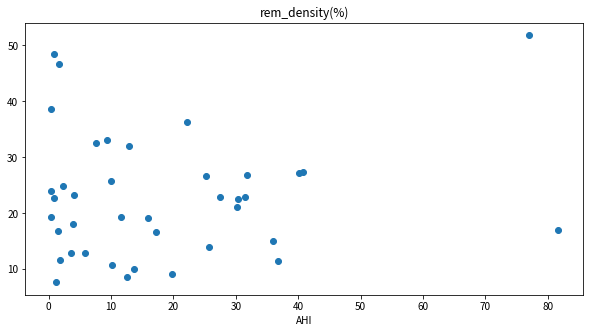

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

ids = np.array(df['id'])
x_ahi = np.array(df['x_ahi'], dtype=np.single)
x_rem_per = np.array(df['x_rem_per'], dtype=np.single)
x_rem_latency = np.array(df['x_rem_latency'], dtype=np.int)
x_rem_num = np.array(df['x_rem_num'], dtype=np.int)
x_rem_avg = np.array(df['x_rem_avg'], dtype=np.single)
x_rem_duration = np.array(df['x_rem_duration'], dtype=np.single)
x_rem_frag = np.array(df['x_rem_frag'], dtype=np.single)
x_rem_density = np.array(df['x_rem_density'], dtype=np.single)

rem_df = pd.DataFrame({'x_ahi': x_ahi, 
                       'x_rem_per': x_rem_per, 
                       'x_rem_latency': x_rem_latency, 
                       'x_rem_num': x_rem_num, 
                       'x_rem_avg': x_rem_avg, 
                       'x_rem_duration': x_rem_duration, 
                       'x_rem_frag': x_rem_frag, 
                       'x_rem_density': x_rem_density
                      }, index = ids)

rem_df = rem_df.sort_values('x_ahi')

plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']

# x_rem_percentage
x = np.array(rem_df['x_ahi'])
y = np.array(rem_df['x_rem_per'])
plt.figure(figsize=(10,5)) 
plt.scatter(x=x, y=y)
plt.xlabel('AHI')
plt.title('rem_percentage(%)')

# x_rem_latency
y = np.array(rem_df['x_rem_latency'])
plt.figure(figsize=(10,5)) 
plt.scatter(x=x, y=y)
plt.xlabel('AHI')
plt.title('rem_latency(s)')

# x_rem_num
y = np.array(rem_df['x_rem_num'])
plt.figure(figsize=(10,5)) 
plt.scatter(x=x, y=y)
plt.xlabel('AHI')
plt.title('rem_num(%)')

# x_rem_length_average
y = np.array(rem_df['x_rem_avg'])
plt.figure(figsize=(10,5)) 
plt.scatter(x=x, y=y)
plt.xlabel('AHI')
plt.title('rem_length_average(s)')

# x_rem_duration
y = np.array(rem_df['x_rem_duration'])
plt.figure(figsize=(10,5)) 
plt.scatter(x=x, y=y)
plt.xlabel('AHI')
plt.title('rem_duration(s)')

# x_rem_fragmentation
y = np.array(rem_df['x_rem_frag'])
plt.figure(figsize=(10,5)) 
plt.scatter(x=x, y=y)
plt.xlabel('AHI')
plt.title('rem_fragmentation(%)')

# x_rem_density
y = np.array(rem_df['x_rem_density'])
plt.figure(figsize=(10,5)) 
plt.scatter(x=x, y=y)
plt.xlabel('AHI')
plt.title('rem_density(%)')